**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping

2023-02-13 17:46:15.835324: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-13 17:46:15.835366: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Loading the Dataset


Loading the 2 most recent transactions of the customers.

In [2]:
number_of_transactions = 2

In [3]:
data = pd.read_csv('/data/elastic-notebook/data/amex-default-prediction/train_data.csv', nrows=200000).groupby('customer_ID').tail(number_of_transactions).set_index('customer_ID', drop=True).sort_index()
labels = pd.read_csv('/data/elastic-notebook/data/amex-default-prediction/train_labels.csv').set_index('customer_ID', drop=True).sort_index()

**Merging the Training data with Labels**

In [4]:
train_df = pd.merge(data, labels, left_index=True, right_index=True)  

In [5]:
train_df.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2018-02-21,0.937349,0.002425,0.019837,1.008307,0.000607,0.102985,0.006174,0.007454,NaN,...,NaN,NaN,0.001563,0.001976,0.002569,NaN,0.001098,0.006346,0.004204,0
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2018-03-13,0.934745,0.009119,0.009382,1.007647,0.006104,0.135021,0.001604,0.007174,NaN,...,NaN,NaN,0.007186,0.004234,0.005086,NaN,0.005810,0.002970,0.008533,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,2018-02-06,0.878856,0.536290,0.034558,1.005419,0.007248,0.159486,0.006274,0.008733,NaN,...,NaN,NaN,0.006658,0.004627,0.004820,NaN,0.008272,0.002528,0.003584,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,2018-03-25,0.880519,0.178126,0.034684,1.004028,0.006911,0.165509,0.005552,0.005068,NaN,...,NaN,NaN,0.002980,0.007479,0.007870,NaN,0.003284,0.003169,0.008514,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,2018-02-09,0.866342,0.001526,0.008318,0.818953,0.006756,NaN,0.009511,0.004373,NaN,...,NaN,NaN,0.008112,0.009543,0.003328,NaN,0.004781,0.007325,0.005606,0


In [6]:
print("The number of observations in Training Dataset is :",len(train_df))

The number of observations in Training Dataset is : 32978


In [7]:
train_df.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2018-02-21,0.937349,0.002425,0.019837,1.008307,0.000607,0.102985,0.006174,0.007454,NaN,...,NaN,NaN,0.001563,0.001976,0.002569,NaN,0.001098,0.006346,0.004204,0
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2018-03-13,0.934745,0.009119,0.009382,1.007647,0.006104,0.135021,0.001604,0.007174,NaN,...,NaN,NaN,0.007186,0.004234,0.005086,NaN,0.005810,0.002970,0.008533,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,2018-02-06,0.878856,0.536290,0.034558,1.005419,0.007248,0.159486,0.006274,0.008733,NaN,...,NaN,NaN,0.006658,0.004627,0.004820,NaN,0.008272,0.002528,0.003584,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,2018-03-25,0.880519,0.178126,0.034684,1.004028,0.006911,0.165509,0.005552,0.005068,NaN,...,NaN,NaN,0.002980,0.007479,0.007870,NaN,0.003284,0.003169,0.008514,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,2018-02-09,0.866342,0.001526,0.008318,0.818953,0.006756,NaN,0.009511,0.004373,NaN,...,NaN,NaN,0.008112,0.009543,0.003328,NaN,0.004781,0.007325,0.005606,0


**Descriptive Statistics**

In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
P_2,32759.0,0.632882,0.266624,-3.552304e-01,0.447735,0.678158,0.859826,1.009943
D_39,32978.0,0.196908,0.369475,7.301857e-07,0.004974,0.009976,0.271073,5.036047
B_1,32978.0,0.140342,0.231423,-3.093297e-01,0.009007,0.034422,0.158221,1.324053
B_2,32975.0,0.585763,0.413427,6.180084e-06,0.068823,0.813246,1.001860,1.009999
R_1,32978.0,0.107610,0.278192,6.440720e-07,0.003001,0.005953,0.008901,2.507711
...,...,...,...,...,...,...,...,...
D_142,5767.0,0.394600,0.245088,-9.399561e-03,0.193622,0.380992,0.581989,1.751388
D_143,32729.0,0.181147,0.380926,1.653580e-08,0.003047,0.006103,0.009121,1.009993
D_144,32972.0,0.052129,0.181858,7.164186e-07,0.002707,0.005460,0.008242,1.342748
D_145,32729.0,0.063460,0.194880,4.609489e-08,0.003001,0.006053,0.009088,4.187805



# Visualisation

**Count Plot of the Target Variable**

<AxesSubplot: xlabel='target', ylabel='count'>

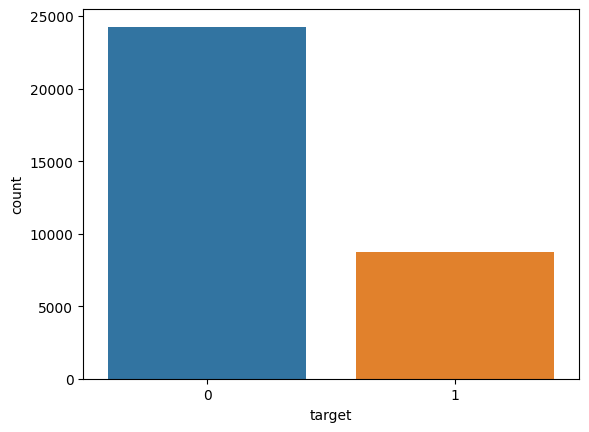

In [9]:
sns.countplot(x = 'target',data = train_df)

# Pre-Processing

**Dropping the Transaction Dates**

In [10]:
drop_cols = ['S_2'] 
train_df.drop(drop_cols, inplace=True, axis=1)

**Creating Training Labels and Data**

In [11]:
train_df1 = pd.get_dummies(train_df)

In [12]:
y = train_df1['target']
X = train_df1.drop('target', axis=1)

**Handling missing values**

Missing values are imputed with the respective column mean.

In [13]:
col_names = X.columns
imputer = SimpleImputer()
X = pd.DataFrame(imputer.fit_transform(X))  
X.columns = col_names

**Standardization**

In [14]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns) 

**Splitting into training and validation sets**

In [15]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1, shuffle=True, stratify=y, test_size=0.2)

Memory cleanup to prevent out of memory error.

In [16]:
del data, labels, X, y
gc.collect()

19

# Model Building

**Logistic Regression**

In [17]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn import metrics

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf_lr = LogisticRegression(n_jobs=1, C=1e5,solver='liblinear')
clf_lr.fit(train_X, train_y)

LogisticRegression(C=100000.0, n_jobs=1, solver='liblinear')

In [20]:

y_pred_val_lr = clf_lr.predict(val_X)
print('Accuracy on Validation set :',accuracy_score(val_y, y_pred_val_lr))
print("\n")
print(classification_report(val_y, y_pred_val_lr))

Accuracy on Validation set : 0.8950879320800486


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4854
           1       0.81      0.78      0.80      1742

    accuracy                           0.90      6596
   macro avg       0.87      0.86      0.86      6596
weighted avg       0.89      0.90      0.89      6596

CPU times: user 193 ms, sys: 823 ms, total: 1.02 s
Wall time: 20 ms


**Support Vector Classifier**

In [21]:
from sklearn.linear_model import SGDClassifier

In [22]:
sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd.fit(train_X, train_y)

SGDClassifier(alpha=0.001, max_iter=5, random_state=42, tol=None)

In [23]:

y_pred_val_sgd = sgd.predict(val_X)
print('Accuracy on Validation set :',accuracy_score(val_y, y_pred_val_sgd))
print("\n")
print(classification_report(val_y, y_pred_val_sgd))

Accuracy on Validation set : 0.8779563371740449


              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4854
           1       0.77      0.76      0.77      1742

    accuracy                           0.88      6596
   macro avg       0.84      0.84      0.84      6596
weighted avg       0.88      0.88      0.88      6596

CPU times: user 200 ms, sys: 693 ms, total: 893 ms
Wall time: 16.5 ms


**Decision Tree Classifier**

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dc = DecisionTreeClassifier(random_state=0)
dc.fit(train_X, train_y)

DecisionTreeClassifier(random_state=0)

In [26]:

y_pred_val_dc = dc.predict(val_X)
print('Accuracy on Validation set :',accuracy_score(val_y, y_pred_val_dc))
print("\n")
print(classification_report(val_y, y_pred_val_dc))

Accuracy on Validation set : 0.8506670709520922


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4854
           1       0.72      0.71      0.72      1742

    accuracy                           0.85      6596
   macro avg       0.81      0.81      0.81      6596
weighted avg       0.85      0.85      0.85      6596

CPU times: user 19.5 ms, sys: 0 ns, total: 19.5 ms
Wall time: 17.9 ms


In [27]:
from lightgbm import LGBMClassifier

In [28]:
lgbm = LGBMClassifier()
lgbm.fit(train_X, train_y)

LGBMClassifier()

In [29]:

y_pred_val_lgbm = lgbm.predict(val_X)
print('Accuracy on Validation set :',accuracy_score(val_y, y_pred_val_lgbm))
print("\n")
print(classification_report(val_y, y_pred_val_lgbm))

Accuracy on Validation set : 0.9035779260157671


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4854
           1       0.82      0.82      0.82      1742

    accuracy                           0.90      6596
   macro avg       0.88      0.88      0.88      6596
weighted avg       0.90      0.90      0.90      6596

CPU times: user 4.84 s, sys: 14 ms, total: 4.86 s
Wall time: 41.1 ms


**Listing Accuracies on Validation Data**

In [30]:
print('\nAccuracy of Logistic Regression :',accuracy_score(val_y, y_pred_val_lr))
print('\nAccuracy of Support Vector :',accuracy_score(val_y, y_pred_val_sgd))
print('\nAccuracy of Decision Tree :',accuracy_score(val_y, y_pred_val_dc))
print('\nAccuracy Light GBM Classifier :',accuracy_score(val_y, y_pred_val_lgbm))


Accuracy of Logistic Regression : 0.8950879320800486

Accuracy of Support Vector : 0.8779563371740449

Accuracy of Decision Tree : 0.8506670709520922

Accuracy Light GBM Classifier : 0.9035779260157671


# Inferences

The best accuracy is obtained using Light GBM Classifier.